### Initialise

In [1]:
## Import necessary packages
import matplotlib.pyplot as plt; 
import pandas as pd; 
import numpy as np; 
import json; 
# from datetime import datetime; 

from sklearn.model_selection import train_test_split;
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import python.data as datameta

In [2]:
def mse(a,b): return (mean_squared_error(a,b)); 
def mae(a,b): return (mean_absolute_error(a,b)); 
def r2(a,b): return (r2_score(a,b)**0.5); 
def isClose(base, known, tol=0.001): return np.abs((base - known) / base) <= tol; 
def pct(val): return str(val*100)[:5]+"%"; 

def row(name,ytest, yhat, accuracies):
    return [
        name, 
        r2(ytest, yhat),mae(ytest, yhat),mse(ytest, yhat), 
        accuracies[0], accuracies[1], accuracies[2]
    ]; 

def accuracy(test,pred,tol): 
    checks = np.isclose(test,pred, rtol=tol); 
    acc = np.sum(checks)/len(checks); 
    
    return pct(acc);  

### Preprocess Data

In [3]:
data = datameta.processData('data/ashwin_data.csv'); 
data = data[5:]; 
data.head()

Index(['Time (h)_mean', 'Aeration rate(Fg:L/h)_mean',
       'Sugar feed rate(Fs:L/h)_mean', 'Acid flow rate(Fa:L/h)_mean',
       'Base flow rate(Fb:L/h)_mean', 'Air head pressure(pressure:bar)_mean',
       'Substrate concentration(S:g/L)_mean', 'Vessel Volume(V:L)_mean',
       'pH(pH:pH)_mean', 'Temperature(T:K)_mean',
       'PAA flow(Fpaa:PAA flow (L/h))_mean', 'Oil flow(Foil:L/hr)_mean',
       'Ammonia shots(NH3_shots:kgs)_mean', 'Water Flow_mean', 'Time (h)_std',
       'Aeration rate(Fg:L/h)_std', 'Sugar feed rate(Fs:L/h)_std',
       'Acid flow rate(Fa:L/h)_std', 'Base flow rate(Fb:L/h)_std',
       'Air head pressure(pressure:bar)_std',
       'Substrate concentration(S:g/L)_std', 'Vessel Volume(V:L)_std',
       'pH(pH:pH)_std', 'Temperature(T:K)_std',
       'PAA flow(Fpaa:PAA flow (L/h))_std', 'Oil flow(Foil:L/hr)_std',
       'Ammonia shots(NH3_shots:kgs)_std', 'Water Flow_std', 'Time (h)_max',
       'Aeration rate(Fg:L/h)_max', 'Sugar feed rate(Fs:L/h)_max',
       'A

,Time (h)_mean,Aeration rate(Fg:L/h)_mean,Sugar feed rate(Fs:L/h)_mean,Acid flow rate(Fa:L/h)_mean,Base flow rate(Fb:L/h)_mean,Air head pressure(pressure:bar)_mean,Substrate concentration(S:g/L)_mean,Vessel Volume(V:L)_mean,pH(pH:pH)_mean,Temperature(T:K)_mean,...,Air head pressure(pressure:bar)_min,Substrate concentration(S:g/L)_min,Vessel Volume(V:L)_min,pH(pH:pH)_min,Temperature(T:K)_min,PAA flow(Fpaa:PAA flow (L/h))_min,Oil flow(Foil:L/hr)_min,Ammonia shots(NH3_shots:kgs)_min,Water Flow_min,Penicillin concentration(P:g/L)
5,-1.686999,-3.024788,-2.69834,-0.140341,-1.326449,-2.575004,-0.207601,-1.725402,-0.134967,0.153442,...,-2.551834,-0.207984,-1.715376,-0.267401,0.48637,-0.72962,-0.875667,0.0,-1.401446,-1.443146
6,-1.684007,-3.024788,-2.69834,-0.140341,-1.190789,-2.575004,-0.205311,-1.725519,-0.286846,0.134358,...,-2.551834,-0.205513,-1.715376,-0.267401,0.48637,-0.72962,-0.875667,0.0,-1.398315,-1.443146
7,-1.681015,-3.024788,-2.69834,-0.140341,-0.980954,-2.575004,-0.203198,-1.725402,-0.250542,0.134358,...,-2.551834,-0.203209,-1.715376,-0.267401,0.48637,-0.72962,-0.875667,0.0,-1.391404,-1.443146
8,-1.678022,-3.024788,-2.69834,-0.140341,-0.792846,-2.575004,-0.201274,-1.725131,-0.060309,0.134358,...,-2.551834,-0.201087,-1.715259,-0.212237,0.48637,-0.72962,-0.875667,0.0,-1.381575,-1.443146
9,-1.675030,-3.024788,-2.69834,-0.140341,-0.715976,-2.575004,-0.199540,-1.724782,0.179520,0.134358,...,-2.551834,-0.199153,-1.714910,0.019145,0.48637,-0.72962,-0.875667,0.0,-1.369507,-1.443146


In [4]:
# Split into x and y
# xkeys = [
#     "Time (h)", "Aeration rate(Fg:L/h)", "Sugar feed rate(Fs:L/h)","Acid flow rate(Fa:L/h)",
#     "Base flow rate(Fb:L/h)","Water Flow","Substrate concentration(S:g/L)","PAA flow(Fpaa:PAA flow (L/h))",
#     "Oil flow(Foil:L/hr)", "Ammonia shots(NH3_shots:kgs)",
#     # Converted variables
#     "Air head pressure(pressure:bar)", "Temperature(T:K)", "pH(pH:pH)", "Vessel Volume(V:L)"
# ]
ykeys = ["Penicillin concentration(P:g/L)"]; 
(x,y) = datameta.xy_split_y(data,ykeys); 
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.11); 
# ytest = ytest.to_numpy().flatten(); 


xtrain_mean = np.mean(xtrain, axis=0); 
xtrain_std = np.std(xtrain, axis=0) +1e-29; 

ytrain_mean = np.mean(ytrain, axis=0); 
ytrain_std = np.std(ytrain, axis=0) +1e-29; 

print(
    xtrain.shape,
    xtrain_mean.shape,
    xtrain_std.shape
)

print(
    ytrain.shape,
    ytrain_mean.shape,
    ytrain_std.shape
)

ytrain_mean = ytrain_mean.values.reshape(1,-1); 
xtrain_mean = xtrain_mean.values.reshape(1,-1); 
ytrain_std = ytrain_std.values.reshape(1,-1); 
xtrain_std = xtrain_std.values.reshape(1,-1); 

xtrain, xtest = (xtrain - xtrain_mean)/xtrain_std, (xtest - xtrain_mean)/xtrain_std; 
ytrain, ytest = (ytrain - ytrain_mean)/ytrain_std, (ytest - ytrain_mean)/ytrain_std; 

# SETUP ENDS HERE

x:  56  keys in  56 cols
y:  1  keys in  1 cols
(101393, 56) (56,) (56,)
(101393, 1) (1,) (1,)


In [5]:
model = DecisionTreeRegressor(); 
model.fit(xtrain,ytrain); 

print(
    f"Train: {pct(model.score(xtrain,ytrain))}\n",
    f"Test: {pct(model.score(xtest,ytest))}"
)

Train: 99.99%
 Test: 99.53%


(12532, 1) (12532, 1)
18.47%


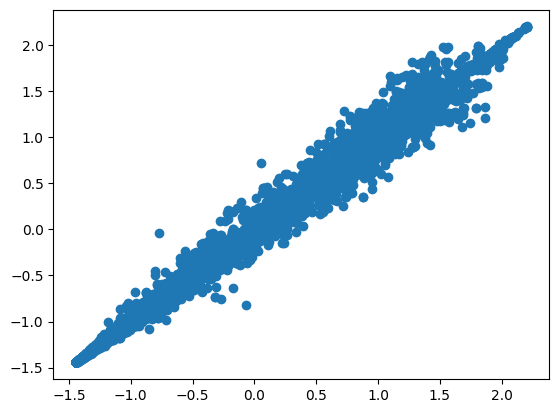

In [6]:
prediction= pd.DataFrame(model.predict(xtest));  
plt.scatter(ytest,prediction); 

print(ytest.shape, prediction.shape); 
print(accuracy(ytest, prediction, 0.001)); 

In [7]:
parameters={
    "splitter":["best","random"],
    "max_depth" : [i for i in range(10,15)],
    "min_samples_leaf":[i for i in range(4,11)],
    "min_weight_fraction_leaf":[0.0, 0.1],
    "max_leaf_nodes":[i*10 for i in range(6,12)]
}

In [8]:
from sklearn.model_selection import GridSearchCV; 

tuning_model=GridSearchCV(model,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=3, n_jobs=-1,verbose=2)

tuning_model.fit(x, y)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.0, splitter=random; total time=   0.2s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.0, splitter=random; total time=   0.2s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.0, splitter=random; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best; total time=   0.6s
[CV] END max_depth=10, max_leaf_nodes=60, 

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'max_leaf_nodes': [60, 70, 80, 90, 100, 110],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [9]:
print(tuning_model)
print("BEST: ",tuning_model.best_params_, tuning_model.best_score_)
results = pd.DataFrame(tuning_model.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)
configs = results[:15]["params"].to_numpy().tolist()
configs = json.dumps(configs)
print(configs)

file = open("data/dtr_cfgs.json", "w+")
content = str(configs)
file.write(content)
file.close()

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'max_leaf_nodes': [60, 70, 80, 90, 100, 110],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error', verbose=2)
BEST:  {'max_depth': 14, 'max_leaf_nodes': 90, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'} -0.17095832595143975
[{"max_depth": 14, "max_leaf_nodes": 90, "min_samples_leaf": 6, "min_weight_fraction_leaf": 0.0, "splitter": "random"}, {"max_depth": 14, "max_leaf_nodes": 80, "min_samples_leaf": 7, "min_weight_fraction_leaf": 0.0, "splitter": "random"}, {"max_depth": 14, "max_leaf_nodes": 80, "min_samples_leaf": 9, "min_weight_fraction_leaf": 0.0, "splitter": "random"}, {"max_depth": 11, "max_leaf_nodes": 100, "min

In [10]:
# RUN FROM HERE
file = open("data/dtr_cfgs.json", "r")
content = file.read()
file.close()
configs = json.loads(content); 

for dict in configs:
    for key,value in enumerate(dict):
        if value=="null": 
            dict[key] = None; 

In [11]:
table = [0 for _ in range(len(configs))]

# configs.append({})
for index,config in enumerate(configs):
    print(f"Running: {config}")
    tmodel = DecisionTreeRegressor(**config); 
    tmodel.fit(xtrain,ytrain); 

    yhat = pd.DataFrame(tmodel.predict(xtest))

    accuracies = list(map(
        lambda x: accuracy(yhat, ytest, x)
    ,[0.005, 0.01, 0.1])) 
    print(
        ytest.shape,    
        yhat.shape
    )

    table[index] = row(json.dumps(config), ytest, yhat, accuracies)

table = pd.DataFrame(table, columns=["","R2","MAE", "MSE","Acc@0.1%", "Acc@1%", "Acc@10%"]); 
table

Running: {'max_depth': 14, 'max_leaf_nodes': 90, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}
(12532, 1) (12532, 1)
Running: {'max_depth': 14, 'max_leaf_nodes': 80, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}
(12532, 1) (12532, 1)
Running: {'max_depth': 14, 'max_leaf_nodes': 80, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}
(12532, 1) (12532, 1)
Running: {'max_depth': 11, 'max_leaf_nodes': 100, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}
(12532, 1) (12532, 1)
Running: {'max_depth': 13, 'max_leaf_nodes': 110, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}
(12532, 1) (12532, 1)
Running: {'max_depth': 12, 'max_leaf_nodes': 90, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}
(12532, 1) (12532, 1)
Running: {'max_depth': 13, 'max_leaf_nodes': 110, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.

,,R2,MAE,MSE,Acc@0.1%,Acc@1%,Acc@10%
0,"{""max_depth"": 14, ""max_leaf_nodes"": 90, ""min_s...",0.990389,0.095738,0.019469,13.90%%,17.27%%,51.65%%
1,"{""max_depth"": 14, ""max_leaf_nodes"": 80, ""min_s...",0.990598,0.098026,0.019047,13.73%%,16.59%%,50.98%%
2,"{""max_depth"": 14, ""max_leaf_nodes"": 80, ""min_s...",0.990960,0.097011,0.018316,3.016%%,15.69%%,51.86%%
3,"{""max_depth"": 11, ""max_leaf_nodes"": 100, ""min_...",0.991633,0.092980,0.016959,3.239%%,16.93%%,52.60%%
4,"{""max_depth"": 13, ""max_leaf_nodes"": 110, ""min_...",0.991696,0.091953,0.016832,5.146%%,16.86%%,52.97%%
5,"{""max_depth"": 12, ""max_leaf_nodes"": 90, ""min_s...",0.990963,0.096643,0.018310,3.016%%,16.15%%,52.21%%
6,"{""max_depth"": 13, ""max_leaf_nodes"": 110, ""min_...",0.991772,0.091410,0.016678,3.662%%,17.47%%,52.99%%
7,"{""max_depth"": 14, ""max_leaf_nodes"": 100, ""min_...",0.991393,0.093420,0.017444,13.61%%,16.60%%,52.00%%
8,"{""max_depth"": 10, ""max_leaf_nodes"": 90, ""min_s...",0.990628,0.097894,0.018986,5.082%%,16.83%%,50.87%%
9,"{""max_depth"": 11, ""max_leaf_nodes"": 110, ""min_...",0.991540,0.091624,0.017146,13.95%%,17.82%%,52.66%%


In [14]:
table = [0]

model = DecisionTreeRegressor(); 
model.fit(xtrain,ytrain); 

yhat = pd.DataFrame(model.predict(xtest))

accuracies = list(map(
    lambda x: accuracy(yhat, ytest, x)
,[0.001, 0.01, 0.1])) 
print(f"Accuracies: {accuracies}")
table[0] = row(json.dumps(config), ytest , model.predict(xtest), accuracies)


Accuracies: ['18.48%', '62.63%', '87.13%']


In [13]:
print(xtrain.keys())
plt.hist(xtrain["Vessel Volume(V:L)"], bins=100)


Index(['PAA flow(Fpaa:PAA flow (L/h))_min', 'Temperature(T:K)_max',
       'Aeration rate(Fg:L/h)_std', 'Substrate concentration(S:g/L)_std',
       'Sugar feed rate(Fs:L/h)_mean', 'PAA flow(Fpaa:PAA flow (L/h))_max',
       'Water Flow_mean', 'Base flow rate(Fb:L/h)_mean',
       'Oil flow(Foil:L/hr)_min', 'Air head pressure(pressure:bar)_min',
       'Aeration rate(Fg:L/h)_min', 'Time (h)_std', 'Time (h)_min',
       'pH(pH:pH)_min', 'Air head pressure(pressure:bar)_mean',
       'Air head pressure(pressure:bar)_max', 'Vessel Volume(V:L)_mean',
       'Temperature(T:K)_mean', 'Water Flow_max',
       'PAA flow(Fpaa:PAA flow (L/h))_mean',
       'Air head pressure(pressure:bar)_std', 'Oil flow(Foil:L/hr)_std',
       'Ammonia shots(NH3_shots:kgs)_std', 'Sugar feed rate(Fs:L/h)_std',
       'Acid flow rate(Fa:L/h)_mean', 'Oil flow(Foil:L/hr)_max',
       'Acid flow rate(Fa:L/h)_std', 'Aeration rate(Fg:L/h)_max',
       'Time (h)_max', 'Vessel Volume(V:L)_max', 'Base flow rate(Fb:L/h)_m

KeyError: 'Vessel Volume(V:L)'

In [ ]:
plt.hist(yhat, bins=100)


In [ ]:
plt.hist(ytest, bins=100)